## Fruit Recognition

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "train",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 1212 files belonging to 6 classes.


In [4]:
class_names = dataset.class_names
class_names

['freshapples',
 'freshbanana',
 'freshoranges',
 'rottenapples',
 'rottenbanana',
 'rottenoranges']

In [5]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[3 3 0 1 5 0 3 4 3 5 4 5 5 0 1 3 1 1 1 4 0 1 5 2 2 2 4 1 1 3 0 5]


In [6]:
for image_batch,labels_batch in dataset.take(1):
    print(image_batch[0].numpy())
   # print(labels_batch.numpy())

[[[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 [[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 [[253.      253.      253.     ]
  [253.      253.      253.     ]
  [253.      253.      253.     ]
  ...
  [249.      249.      249.     ]
  [249.      249.      249.     ]
  [249.      249.      249.     ]]

 ...

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [251.95312 250.97656 251.95312]
  [251.95312 250.97656 251.95312]
  [251.95312 250.97656 251.95312]]

 [[255.      255.      255.     ]
  [255.      255.      255.     ]
  [255.      255.      255.     ]
  ...
  [252.      251.      252.     ]
  [2

In [7]:
#visualize

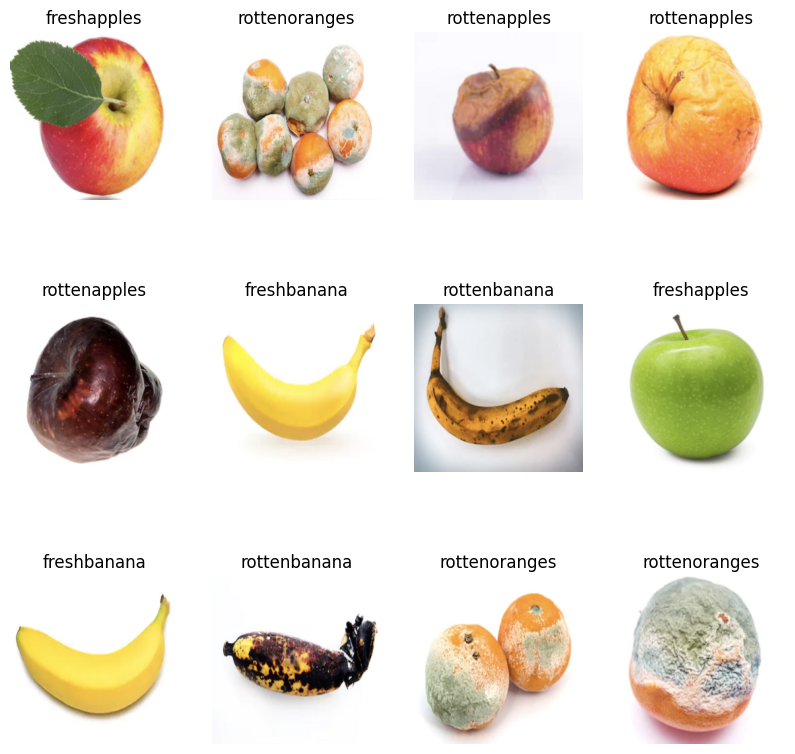

In [8]:
plt.figure(figsize=(10,10))
for image_batch,labels_batch in dataset.take(1):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [11]:
len(train_ds)

30

In [12]:
len(val_ds)

3

In [13]:
len(test_ds)

5

In [14]:
# shuffle

In [15]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [16]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Normalization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Resizing, Rescaling

In [17]:
resize_and_rescale = Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),   # Resize images
    Rescaling(1. / 255)                 # Rescale pixel values
])

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import RandomFlip, RandomRotation

# Define the data augmentation pipeline
data_augmentation = Sequential([
    RandomFlip("horizontal_and_vertical"),  # Randomly flip images
    RandomRotation(0.2)                     # Randomly rotate images by 20%
])


In [19]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [21]:
from tensorflow.keras import models, layers

# Assuming resize_and_rescale is defined somewhere above.
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 6

model = models.Sequential([
    layers.Input(shape=input_shape),  # Use Input layer here
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

# No need to call `build()` manually with input_shape here.
model.summary()  # Print the model architecture.


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)       ┃ Output Shape  ┃ Param # ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ sequential         │ (None, 256,   │       0 │
│ (Sequential)       │ 256, 3)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_6 (Conv2D)  │ (None, 254,   │     896 │
│                    │ 254, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_6    │ (None, 127,   │       0 │
│ (MaxPooling2D)     │ 127, 32)      │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_7 (Conv2D)  │ (None, 125,   │  18,496 │
│                    │ 125, 64)      │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_7    │ (None, 62,    │       0 │
│ (MaxPooling2D)     │ 62, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_8 (Conv2D)  │ (None, 60,    │  36,928 │
│                    │ 60, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_8    │ (None, 30,    │       0 │
│ (MaxPooling2D)     │ 30, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_9 (Conv2D)  │ (None, 28,    │  36,928 │
│                    │ 28, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_9    │ (None, 14,    │       0 │
│ (MaxPooling2D)     │ 14, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_10 (Conv2D) │ (None, 12,    │  36,928 │
│                    │ 12, 64)       │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_10   │ (None, 6, 6,  │       0 │
│ (MaxPooling2D)     │ 64)           │         │
├────────────────────┼───────────────┼─────────┤
│ conv2d_11 (Conv2D) │ (None, 4, 4,  │  36,928 │
│                    │ 64)           │         │
├────────────────────┼───────────────┼─────────┤
│ max_pooling2d_11   │ (None, 2, 2,  │       0 │
│ (MaxPooling2D)     │ 64)           │         │
├────────────────────┼───────────────┼─────────┤
│ flatten_1          │ (None, 256)   │       0 │
│ (Flatten)          │               │         │
├────────────────────┼───────────────┼─────────┤
│ dense_2 (Dense)    │ (None, 64)    │  16,448 │
├────────────────────┼───────────────┼─────────┤
│ dense_3 (Dense)    │ (None, 6)     │     390 │
└────────────────────┴───────────────┴─────────┘

 Total params: 183,942 (718.52 KB)

 Trainable params: 183,942 (718.52 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=40,
)

Epoch 1/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 26s 750ms/step - accuracy: 0.2698 - loss: 1.6676 - val_accuracy: 0.3854 - val_loss: 1.3084
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 752ms/step - accuracy: 0.4450 - loss: 1.2942 - val_accuracy: 0.4792 - val_loss: 1.3032
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 23s 766ms/step - accuracy: 0.5584 - loss: 1.1247 - val_accuracy: 0.5938 - val_loss: 0.9967
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 808ms/step - accuracy: 0.6921 - loss: 0.8335 - val_accuracy: 0.8229 - val_loss: 0.5033
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 878ms/step - accuracy: 0.7847 - loss: 0.6325 - val_accuracy: 0.7396 - val_loss: 0.6362
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 784ms/step - accuracy: 0.7631 - loss: 0.6613 - val_accuracy: 0.8021 - val_loss: 0.4921
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 792ms/step - accuracy: 0.7875 - loss: 0.5428 - val_accuracy: 0.8750 - val_loss: 0.3237
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 808ms/step - accuracy: 0.8385 - loss: 0.4579 - val_accu

In [24]:
scores = model.evaluate(test_ds)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 264ms/step - accuracy: 0.7864 - loss: 0.5799


In [25]:

scores

[0.5444636344909668, 0.7875000238418579]

first image to predict
actual label: rottenoranges
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
predicted label: rottenoranges


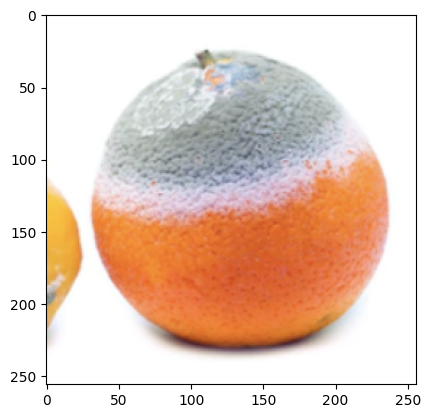

In [26]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


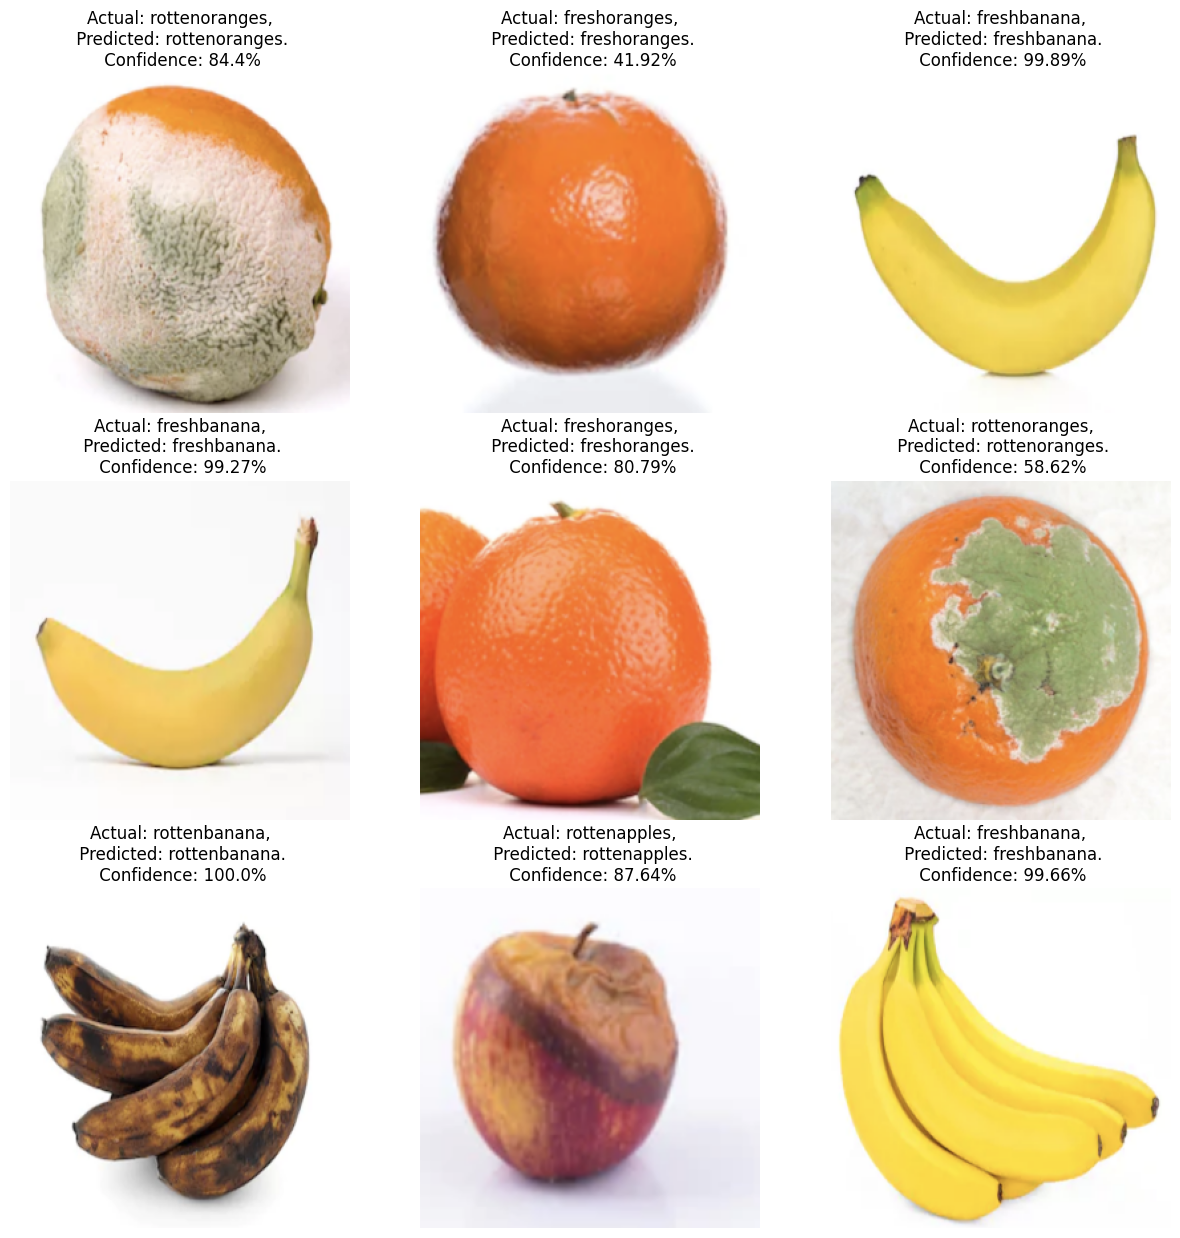

In [28]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [31]:
import os

# Create the models directory if it doesn't exist
if not os.path.exists("models"):
    os.makedirs("models")

# Generate the model version and save it with .h5 extension
model_version = max([int(i) for i in os.listdir("models") if i.isdigit()] + [0]) + 1
model.save(f"models/{model_version}.h5")  # Add .h5 extension here


In [32]:
model.save("models/fruits.h5")
